In [7]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader
from Transformer import SpeechCommandTransformer, train_transformer
import torch
from torch.optim import AdamW

In [2]:
torch.cuda.empty_cache()

In [8]:
train_dataset = SpeechCommandsDataset("../../data/train", mode="original")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=6)

test_dataset = SpeechCommandsDataset("../../data/test", mode="original")
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=6)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

train_transformer(train_loader, test_loader, model=model, num_epochs=10, device=device, optimizer=optimizer)

Epoch [1/10], Train Loss: 2.5060, Train Accuracy: 27.96, Test Accuracy: 52.28%


Epoch [2/10], Train Loss: 1.3145, Train Accuracy: 61.20, Test Accuracy: 67.47%


Epoch [3/10], Train Loss: 0.9532, Train Accuracy: 71.79, Test Accuracy: 75.55%


Epoch [4/10], Train Loss: 0.7749, Train Accuracy: 76.80, Test Accuracy: 78.25%


Epoch [5/10], Train Loss: 0.6627, Train Accuracy: 80.16, Test Accuracy: 79.82%


Epoch [6/10], Train Loss: 0.5849, Train Accuracy: 82.26, Test Accuracy: 81.04%


Epoch [7/10], Train Loss: 0.5209, Train Accuracy: 84.09, Test Accuracy: 79.59%


Epoch [8/10], Train Loss: 0.4783, Train Accuracy: 85.40, Test Accuracy: 83.84%


Epoch [9/10], Train Loss: 0.4359, Train Accuracy: 86.59, Test Accuracy: 82.99%


Epoch [10/10], Train Loss: 0.4025, Train Accuracy: 87.62, Test Accuracy: 83.88%
Best Test Accuracy: 83.88%, Best Train Accuracy: 87.62%


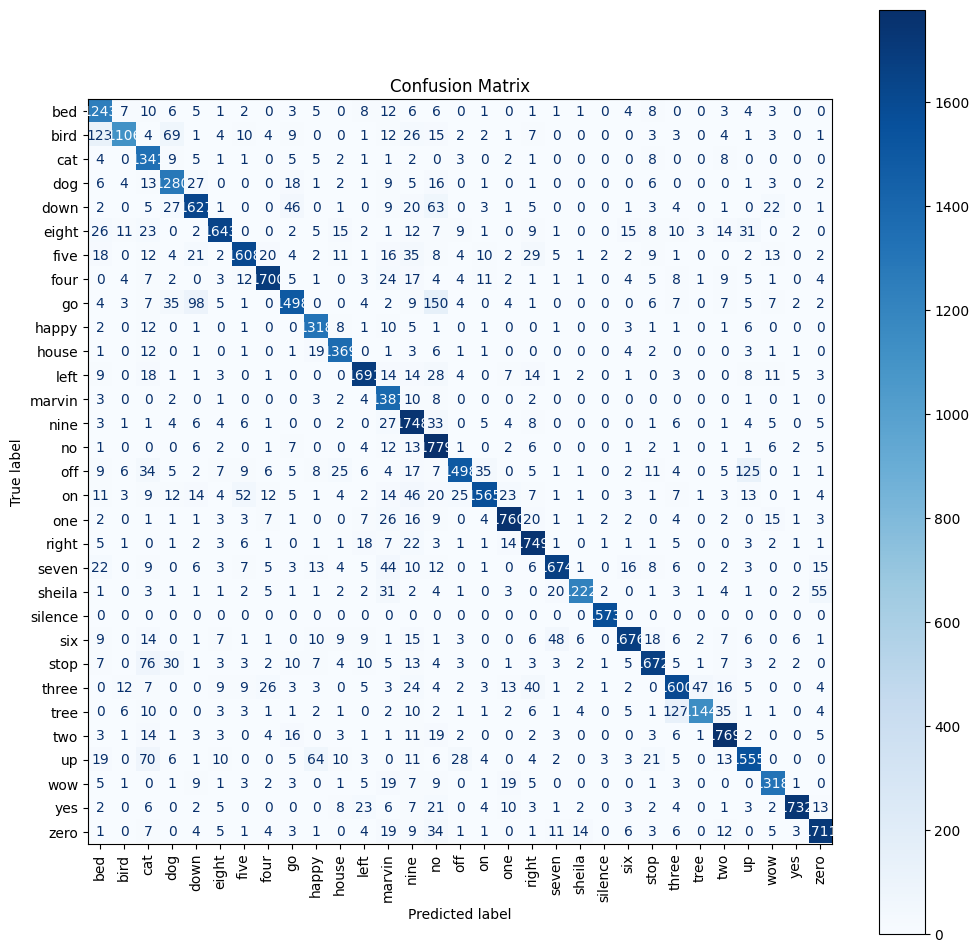

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model.eval()
true_labels = []
pred_labels = []
with torch.no_grad():
    for waveforms, labels in train_loader:
        waveforms = waveforms.squeeze(1).to(device)
        labels = labels.to(device)

        outputs = model(waveforms)
        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

cm = confusion_matrix(true_labels, pred_labels)

label_names = list(train_dataset.class_to_idx.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(include_values=True, xticks_rotation="vertical", ax=ax, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()